In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import datetime as dt
from mpl_finance import candlestick_ohlc
import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [13]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2020-12-24'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.442081,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.434864,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.627323,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.101261,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.944889,82271200


In [14]:
df['Absolute_Return'] = 100 * (df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close'].shift(1)

In [15]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Absolute_Return
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.442081,102223600,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.434864,118071600,-0.017416
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.627323,89738400,0.464486
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.101261,94640000,1.138526
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.944889,82271200,-0.371419
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.940075,86336000,-0.011477
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.930458,95839600,-0.022930
2018-01-11,43.647499,43.872501,43.622501,43.820000,42.168621,74670800,0.567995
2018-01-12,44.044998,44.340000,43.912498,44.272499,42.604076,101672400,1.032653


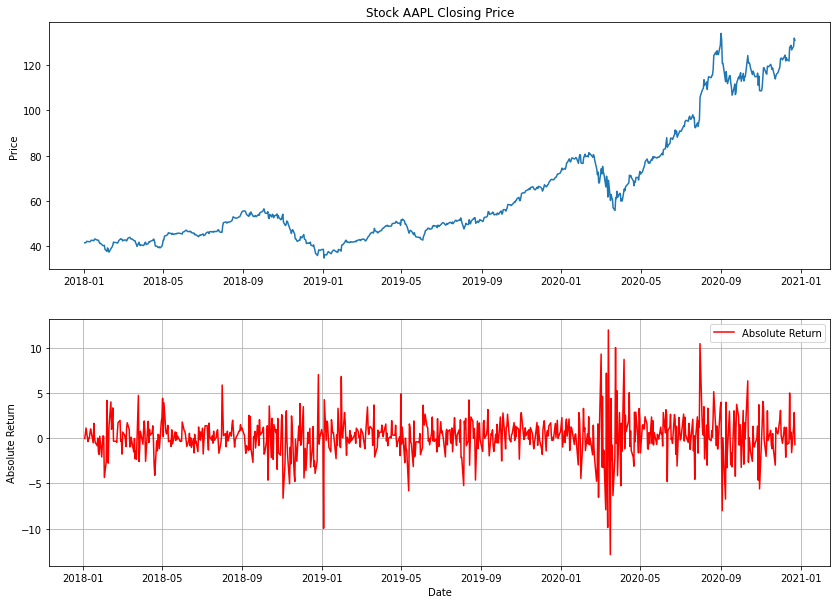

In [16]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Absolute_Return'] , label='Absolute Return', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=0.5, color='darkblue')
#ax2.axhline(y=-0.5, color='darkblue')
ax2.grid()
ax2.set_ylabel('Absolute Return')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

In [17]:
# Here comes the candlestick!!
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Absolute_Return,VolumePositive
0,17533.0,42.540001,43.075001,42.314999,43.064999,41.442081,102223600,NaN,False
1,17534.0,43.132500,43.637501,42.990002,43.057499,41.434864,118071600,-0.017416,False
2,17535.0,43.134998,43.367500,43.020000,43.257500,41.627323,89738400,0.464486,False
3,17536.0,43.360001,43.842499,43.262501,43.750000,42.101261,94640000,1.138526,False
4,17539.0,43.587502,43.902500,43.482498,43.587502,41.944889,82271200,-0.371419,False


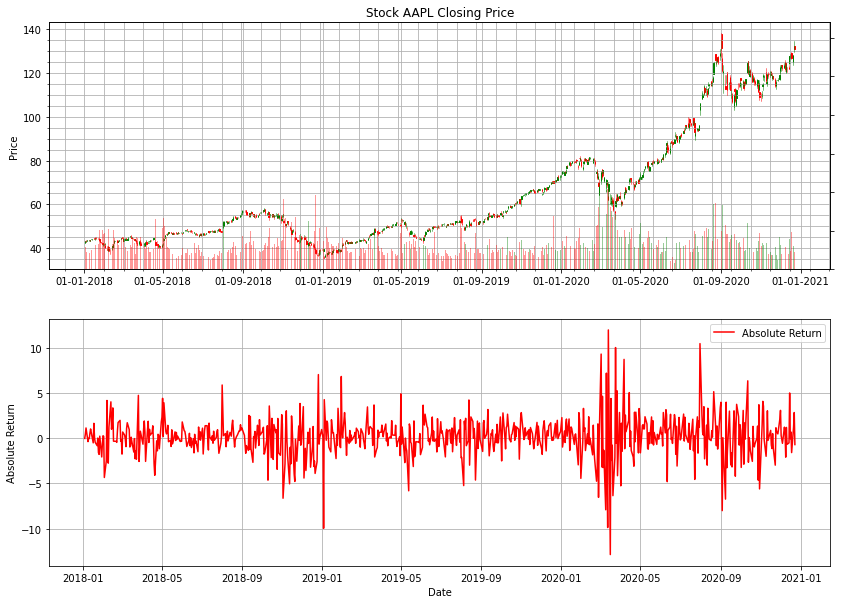

In [18]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Absolute_Return'] , label='Absolute Return', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=0.5, color='darkblue')
#ax2.axhline(y=-0.5, color='darkblue')
ax2.grid()
ax2.set_ylabel('Absolute Return')
ax2.set_xlabel('Date')
ax2.legend(loc='best')